<a href="https://colab.research.google.com/github/NikhithaVarma/Guvi-Task7/blob/main/Assignment_10(KNN_classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,accuracy_score 


Attribute Information:

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
    
    -- 1 building_windows_float_processed

    -- 2 building_windows_non_float_processed

    -- 3 vehicle_windows_float_processed

    -- 4 vehicle_windows_non_float_processed (none in this database)

    -- 5 containers

    -- 6 tableware

    -- 7 headlamps



In [112]:
# Read train and test sets
train_data = pd.read_csv("trainKNN.txt", header=None)
train_data.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']
train_data.head()


,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [113]:
test_data=pd.read_csv("testKNN.txt", header=None)
test_data.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']
test_data.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


 Data Cleaning

In [114]:
#dropping irrelevant fields for prediction
train_data = train_data.drop('ID', axis=1) 
test_data = test_data.drop('ID', axis=1) 


In [115]:
print(train_data.shape)
print(test_data.shape)

(196, 10)
(18, 10)


In [116]:
#checking for null values
train_data.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

In [117]:
test_data.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

In [118]:
#checking for outliers
train_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [119]:
#there are some values which are less than lowerthreshold and more than upper threshold
train_data.RI = train_data.RI.clip(1.512667, 1.522775)
train_data.Na=train_data.Na.clip(11.505, 15.165)
train_data.Al=train_data.Al.clip(0.5413, 2.2712)
train_data.Si=train_data.Si.clip(71.173, 74.224)
train_data.K=train_data.K.clip(-0.565, 1.315)



In [120]:
train_data.dtypes

RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_of_glass      int64
dtype: object

In [121]:
train_data=train_data.drop_duplicates()
test_data=test_data.drop_duplicates()

In [122]:
print(train_data.shape)
print(test_data.shape)

(195, 10)
(18, 10)


In [123]:
train_data.Type_of_glass.value_counts()

2    73
1    66
7    26
3    14
5    10
6     6
Name: Type_of_glass, dtype: int64

**EDA**

Distribution of the target variable


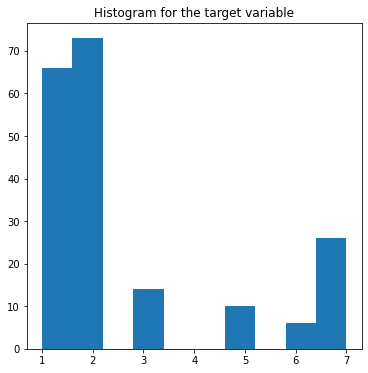

In [124]:
plt.figure(figsize=(6,6))
plt.title("Histogram for the target variable")
plt.hist(data=train_data,x='Type_of_glass',align='mid')
plt.show()

How do our variables interact with one another




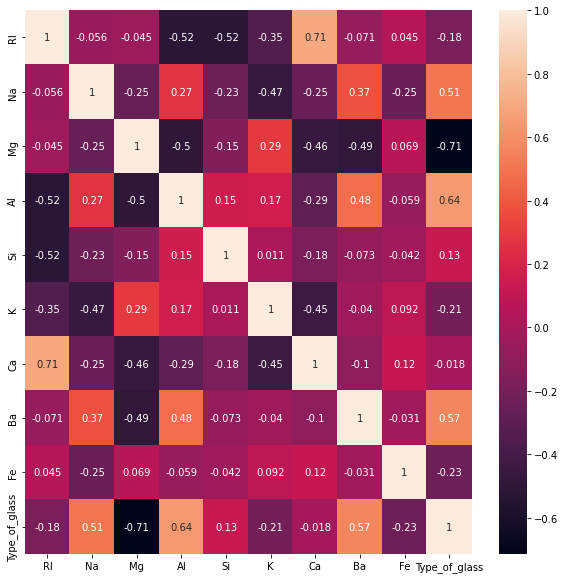

In [125]:
#correlation matrix
import seaborn as sns
cor=train_data.corr()
plt.figure(figsize=(10,10))
#for better visualiztion of correlation | use sns.heatmap()
sns.heatmap(cor,annot=True)

In [126]:
#from the above matrix we can see Ca and RI are highly correlated, this means we can use any one and can drop the other one.we use RI here and drop Ca
train_data=train_data.drop("Ca", axis=1)
test_data=test_data.drop("Ca", axis=1)

In [127]:
print(train_data.shape)
print(test_data.shape)

(195, 9)
(18, 9)


In [128]:
train_data.head()

,RI,Na,Mg,Al,Si,K,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,0.0,0.0,1


In [129]:
X_train=train_data.iloc[:,:-1]#array of features
X_test=test_data.iloc[:,:-1]
y_train=train_data.iloc[:,-1]
y_test=test_data.iloc[:,-1]
X_train

,RI,Na,Mg,Al,Si,K,Ba,Fe
0,1.52101,13.64,4.49,1.1000,71.78,0.060,0.00,0.0
1,1.51761,13.89,3.60,1.3600,72.73,0.480,0.00,0.0
2,1.51618,13.53,3.55,1.5400,72.99,0.390,0.00,0.0
3,1.51766,13.21,3.69,1.2900,72.61,0.570,0.00,0.0
4,1.51742,13.27,3.62,1.2400,73.08,0.550,0.00,0.0
...,...,...,...,...,...,...,...,...
191,1.51645,14.94,0.00,1.8700,73.11,0.000,1.38,0.0
192,1.51831,14.39,0.00,1.8200,72.86,1.315,2.88,0.0
193,1.51640,14.37,0.00,2.2712,72.85,0.000,0.54,0.0
194,1.51623,14.14,0.00,2.2712,72.61,0.080,1.06,0.0


**Standardization**

In [130]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Finding the best value of k for implementing knn**

In [131]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=5))) #predicting using the model


K value  :  1  train score :  1.0  cv score :  0.6153846153846154
K value  :  2  train score :  0.8153846153846154  cv score :  0.6512820512820513
K value  :  3  train score :  0.8358974358974359  cv score :  0.6717948717948717
K value  :  4  train score :  0.7897435897435897  cv score :  0.6923076923076923
K value  :  5  train score :  0.7846153846153846  cv score :  0.6666666666666667
K value  :  6  train score :  0.7846153846153846  cv score :  0.6256410256410256
K value  :  7  train score :  0.7692307692307693  cv score :  0.6461538461538462
K value  :  8  train score :  0.7487179487179487  cv score :  0.6256410256410255
K value  :  9  train score :  0.7589743589743589  cv score :  0.6205128205128204
K value  :  10  train score :  0.7025641025641025  cv score :  0.6153846153846153
K value  :  20  train score :  0.6564102564102564  cv score :  0.5692307692307692
K value  :  50  train score :  0.6256410256410256  cv score :  0.43589743589743596


**K=4** is the best value of k from the above score

Implementing knn classifier with k=4 for 2 distance metrics euclidean and manhattan distances

In [138]:
##with Squared euclidean metric
euc_knn=KNeighborsClassifier(n_neighbors=3,metric="sqeuclidean")
euc_knn.fit(X_train,y_train)
euc_pred=euc_knn.predict(X_test)
print(classification_report(y_test,euc_pred))
print("ACCURACY:",accuracy_score(y_test,euc_pred))

              precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         3

    accuracy                           0.56        18
   macro avg       0.63      0.56      0.51        18
weighted avg       0.63      0.56      0.51        18

ACCURACY: 0.5555555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
#with manhattan distance
man_knn=KNeighborsClassifier(n_neighbors=3,metric="manhattan")
man_knn.fit(X_train,y_train)
man_pred=man_knn.predict(X_test)
print(classification_report(y_test,man_pred))
print("ACCURACY:",accuracy_score(y_test,man_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.50      1.00      0.67         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         3

    accuracy                           0.67        18
   macro avg       0.67      0.67      0.61        18
weighted avg       0.67      0.67      0.61        18

ACCURACY: 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the above comparision, knn with manhattan distance is better than the knn with squared euclidean distance